## Exploratory Data Analysis (EDA) on Women's Clothing E-Commerce Dataset

This notebook explores a women's clothing e-commerce dataset to understand customer buying behavior and identify the most recommended clothing items. The dataset contains 23,486 rows and 10 feature variables.

### Variables in the Dataset:
- **Clothing ID**: Integer categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive integer variable of the reviewer's age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Rating**: Positive ordinal integer variable for the product score granted by the customer from 1 (worst) to 5 (best).
- **Recommended IND**: Binary variable stating whether the customer recommends the product (1 is recommended, 0 is not recommended).
- **Positive Feedback Count**: Positive integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high-level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

### Step-by-Step Analysis:
1. **Load Dataset**: Load the dataset into a pandas DataFrame.
2. **Explore Dataset**: Perform initial exploration to understand the structure and content of the dataset.
3. **Clean Dataset**: Handle missing values and ensure data types are appropriate.
4. **Analysis and Visualization**: Answer the specific questions and visualize the results.



Import necessary libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I used these above libraries to load and manipulate your dataset (pandas), create visualizations (matplotlib.pyplot), and enhance the aesthetics of your plots (seaborn). Each library plays a crucial role in different aspects of your data analysis and visualization tasks.

##**Step 1: Load the dataset**

In [76]:
# Load the dataset
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews_Dataset.csv')

##**Step 2: Basic Data Overview**

In [77]:
# Display the first few rows of the DataFrame
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Unnamed: 11,Unnamed: 12
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,NaN,NaN
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,NaN,NaN
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,NaN,NaN
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,NaN,NaN
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,NaN,`


In [78]:
# Shape of the dataset
df.shape

(23486, 13)

In [79]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               23486 non-null  int64  
 1   Clothing ID              23486 non-null  int64  
 2   Age                      23486 non-null  int64  
 3   Title                    19676 non-null  object 
 4   Review Text              22641 non-null  object 
 5   Rating                   23486 non-null  int64  
 6   Recommended IND          23486 non-null  int64  
 7   Positive Feedback Count  23486 non-null  int64  
 8   Division Name            23472 non-null  object 
 9   Department Name          23472 non-null  object 
 10  Class Name               23472 non-null  object 
 11  Unnamed: 11              0 non-null      float64
 12  Unnamed: 12              1 non-null      object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


Here we get the basic information about the dataset that It has 23,486 entries and 13 columns.

In [80]:
# view all columns of the dataframe
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name ', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [81]:
# Handling column name discrepancies
# Strip any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

This step removes leading or trailing spaces from the column names. Leading or trailing spaces in column names can lead to inconsistencies and errors when accessing columns or performing operations on the DataFrame.

In [82]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                     0
Clothing ID                    0
Age                            0
Title                       3810
Review Text                  845
Rating                         0
Recommended IND                0
Positive Feedback Count        0
Division Name                 14
Department Name               14
Class Name                    14
Unnamed: 11                23486
Unnamed: 12                23485
dtype: int64

Identifying missing values is crucial for data preprocessing and analysis. Missing values can impact the quality of analysis and must be handled appropriately. Here, The dataset contains information about items, but some details are missing. For instance, some items lack titles or reviews, and there are missing categories like 'Division', 'Department', and 'Class' for a few items. Additionally, there are two columns with no useful data. As data analysts, we'll need to decide how to handle these missing parts, whether by filling them in if possible or deciding if they're relevant to our analysis.

##**Step 3: Summary Statistics**

In [83]:
# Display basic statistics
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Unnamed: 11
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,0.0
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936,NaN
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202,NaN
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,NaN
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000,NaN
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000,NaN
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,NaN
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,NaN


The average age of reviewers is approximately 43 years. The average rating is around 4.20, indicating generally positive reviews. Most reviews recommend the products.

In [84]:
# Display the distribution of categorical variables
df['Division Name'].value_counts()

Division Name
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64

In [85]:
df['Department Name'].value_counts()

Department Name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

In [86]:
df['Class Name'].value_counts()

Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

##**Step 4: Clean dataset**


In [87]:
# Remove the extra unnamed columns and unwanted columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 11', 'Unnamed: 12','Title','Review Text','Positive Feedback Count'])

In this step, columns 'Unnamed: 0', 'Unnamed: 11', 'Unnamed: 12', 'Title', and 'Review Text' are dropped from the DataFrame. These columns contain irrelevant information ('Unnamed' columns) and were deemed unnecessary for the analysis ('Title' and 'Review Text').

Text(0.5, 1.0, 'Missing Values per Feature')

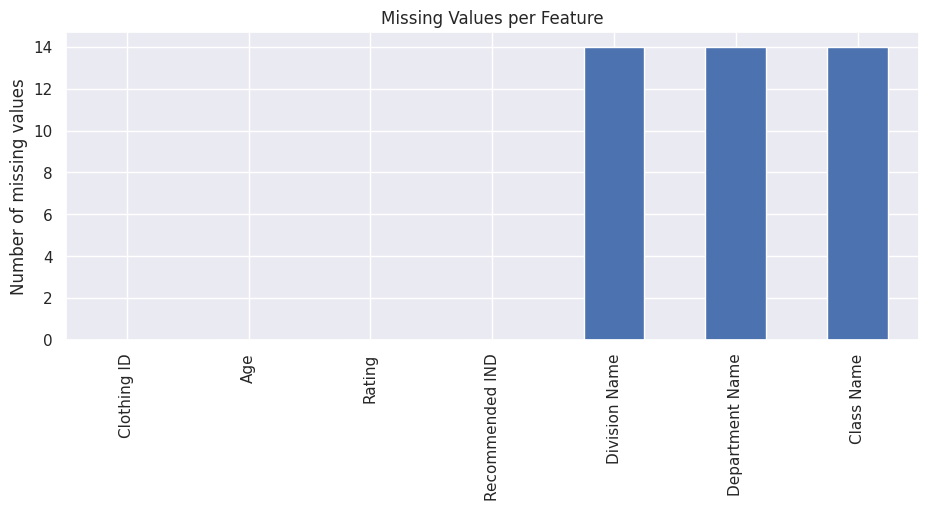

In [88]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')

Understanding missing values is crucial for data quality assessment and handling missing data appropriately.

In [89]:
# Dropping records having null values
df.dropna(inplace=True)

# Confirm there are no more missing values
df.isnull().sum()

Clothing ID        0
Age                0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64

In [90]:
# Checking if any duplicate records are present
duplicate=df[df.duplicated()]
duplicate

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name
46,862,40,5,1,General,Tops,Knits
67,862,40,5,1,General,Tops,Knits
110,861,44,1,0,General Petite,Tops,Knits
168,862,40,5,1,General,Tops,Knits
206,862,43,5,1,General,Tops,Knits
...,...,...,...,...,...,...,...
23470,1104,39,5,1,General Petite,Dresses,Dresses
23473,1104,29,5,1,General Petite,Dresses,Dresses
23474,1104,32,5,1,General Petite,Dresses,Dresses
23477,1094,39,4,1,General Petite,Dresses,Dresses


Identifying and removing duplicate records ensures data integrity and prevents redundancy in analysis. We observed that there were duplicate records present in the dataset. These duplicates occurred for various combinations of features, indicating that the same item or observation was recorded multiple times.Removing duplicate data helps prevent bias in analysis results.

In [91]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

In [92]:
# Again check if any duplicate records are left
duplicate = df[df.duplicated()]
duplicate

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name


In [93]:
# Renaming columns
df.rename(columns={'Recommended IND':'Recommended',
                   'Division Name':'Division', 'Department Name':'Department',
                   'Class Name':'Product name'}, inplace=True)

Renaming columns with clearer and more concise names enhances readability and interpretation of the dataset.

In [94]:
df.shape

(16351, 7)

##**Step 5: Analysis and Visualization**

In this step, we delve into specific questions related to the dataset and employ visualization techniques to gain insights from the data for each question. We will now answer the specific questions and visualize the results:

1. **Most Rated Product Name**
2. **Mean Age for Product Reviews**
3. **Most Number of Products**

In [95]:
df.head()

,Clothing ID,Age,Rating,Recommended,Division,Department,Product name
0,767,33,4,1,Initmates,Intimate,Intimates
1,1080,34,5,1,General,Dresses,Dresses
2,1077,60,3,0,General,Dresses,Dresses
3,1049,50,5,1,General Petite,Bottoms,Pants
4,847,47,5,1,General,Tops,Blouses


In [96]:
# view all columns of the dataframe after remove some columns
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended', 'Division', 'Department',
       'Product name'],
      dtype='object')

In [97]:
df["Age"].value_counts()

Age
39    661
35    549
34    540
38    516
36    505
     ... 
93      2
99      2
86      2
90      2
92      1
Name: count, Length: 77, dtype: int64

In [98]:
# Exclude non-numeric columns before calculating the mean
numeric_columns = df.select_dtypes(include=['int64']).columns
df_mean = df.groupby('Age', as_index=False)[numeric_columns].mean()

# Sorting the DataFrame by 'Age' in descending order
df_mean = df_mean.sort_values('Age', ascending=False)
print(df_mean)

    Clothing ID   Age    Rating  Recommended
76  1013.500000  99.0  4.500000     1.000000
75  1094.333333  94.0  3.333333     0.666667
74   576.500000  93.0  4.500000     1.000000
73  1025.000000  92.0  5.000000     1.000000
72  1006.400000  91.0  3.200000     0.400000
..          ...   ...       ...          ...
4    936.000000  22.0  4.370968     0.887097
3    908.955556  21.0  4.388889     0.900000
2    882.343750  20.0  4.302083     0.854167
1    855.775000  19.0  4.200000     0.875000
0   1010.500000  18.0  4.500000     1.000000

[77 rows x 4 columns]


In [99]:
df["Rating"].value_counts()

Rating
5    7701
4    3866
3    2573
2    1416
1     795
Name: count, dtype: int64

In [100]:
df["Division"].value_counts()

Division
General           9144
General Petite    5761
Initmates         1446
Name: count, dtype: int64

In [101]:
df["Department"].value_counts()

Department
Tops        7076
Dresses     3654
Bottoms     2954
Intimate    1667
Jackets      885
Trend        115
Name: count, dtype: int64

In [102]:
df['Product name'].value_counts()

Product name
Dresses           3654
Knits             2978
Blouses           2194
Sweaters          1086
Pants             1082
Fine gauge         818
Jeans              803
Skirts             764
Lounge             660
Jackets            586
Swim               332
Shorts             303
Outerwear          299
Sleep              227
Legwear            155
Intimates          154
Layering           138
Trend              115
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [103]:
df["Recommended"].value_counts()

Recommended
1    12566
0     3785
Name: count, dtype: int64

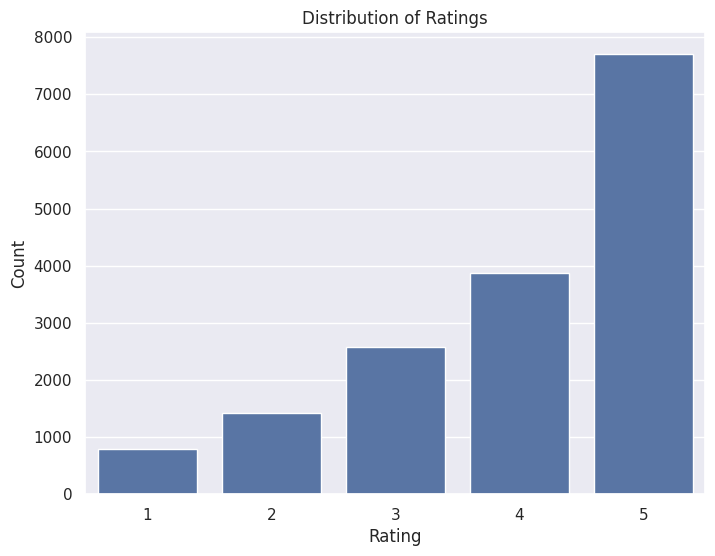

In [104]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

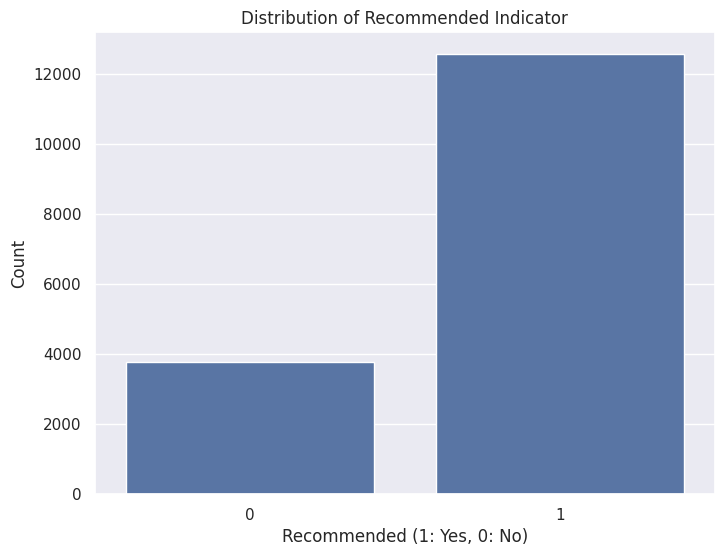

In [105]:
# Distribution of Recommended Indicator
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommended', data=df)
plt.title('Distribution of Recommended Indicator')
plt.xlabel('Recommended (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [110]:
most_rated = df.groupby('Product name').size().sort_values(ascending=False).head(10)
print("Most Rated Products:\n", most_rated)


Most Rated Products:
 Product name
Dresses       3654
Knits         2978
Blouses       2194
Sweaters      1086
Pants         1082
Fine gauge     818
Jeans          803
Skirts         764
Lounge         660
Jackets        586
dtype: int64


In [111]:
mean_age = df['Age'].mean()
print("Mean Age of Reviewers: ", mean_age)

Mean Age of Reviewers:  43.74655984343465


The data suggests that the primary audience engaging with the product is likely adults in their mid-forties. Understanding that the average reviewer is in their mid-forties can provide insights into customer behavior, purchasing patterns, and potential areas for customer satisfaction improvements.

In [112]:
most_products = df['Product name'].value_counts().head(10)
print("Most Number of Products:\n", most_products)

Most Number of Products:
 Product name
Dresses       3654
Knits         2978
Blouses       2194
Sweaters      1086
Pants         1082
Fine gauge     818
Jeans          803
Skirts         764
Lounge         660
Jackets        586
Name: count, dtype: int64


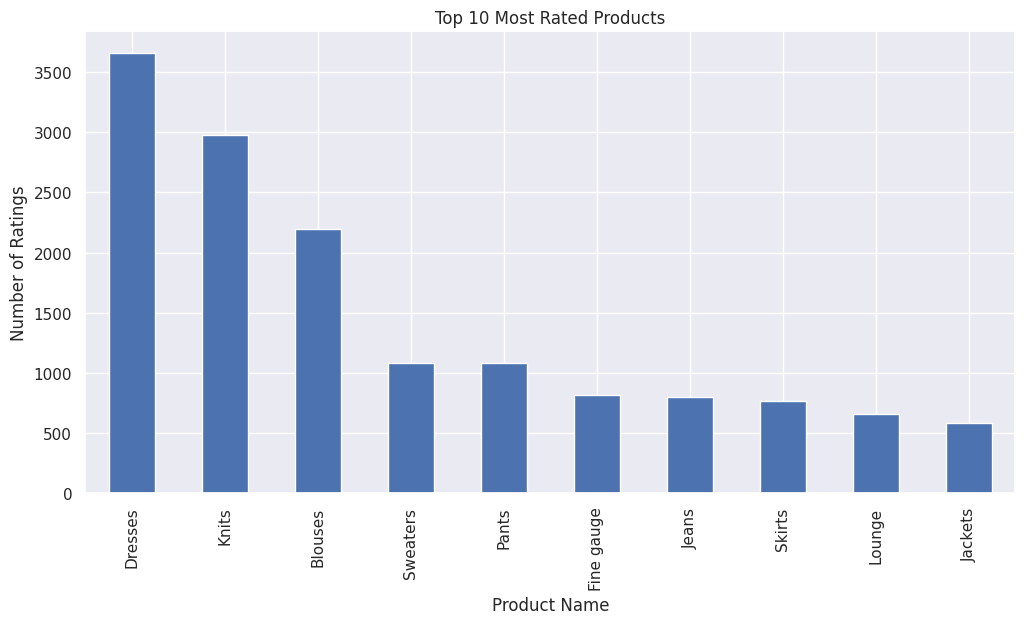

In [113]:
# Visualization for Most Rated Products
plt.figure(figsize=(12, 6))
most_rated.plot(kind='bar')
plt.title('Top 10 Most Rated Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Ratings')
plt.show()

The analysis of the most rated products shows that dresses lead with 3,654 ratings, followed by knits with 2,978 ratings, and blouses with 2,194 ratings. Other highly rated products include sweaters (1,086 ratings), pants (1,082 ratings), fine gauge (818 ratings), jeans (803 ratings), skirts (764 ratings), lounge (660 ratings), and jackets (586 ratings). This indicates that dresses, knits, and blouses are the most popular categories, which should be the primary focus for marketing and inventory management. Ensuring a good stock of these items, tailoring marketing efforts to highlight their popularity, and leveraging customer feedback to improve these products can enhance customer satisfaction and drive sales.


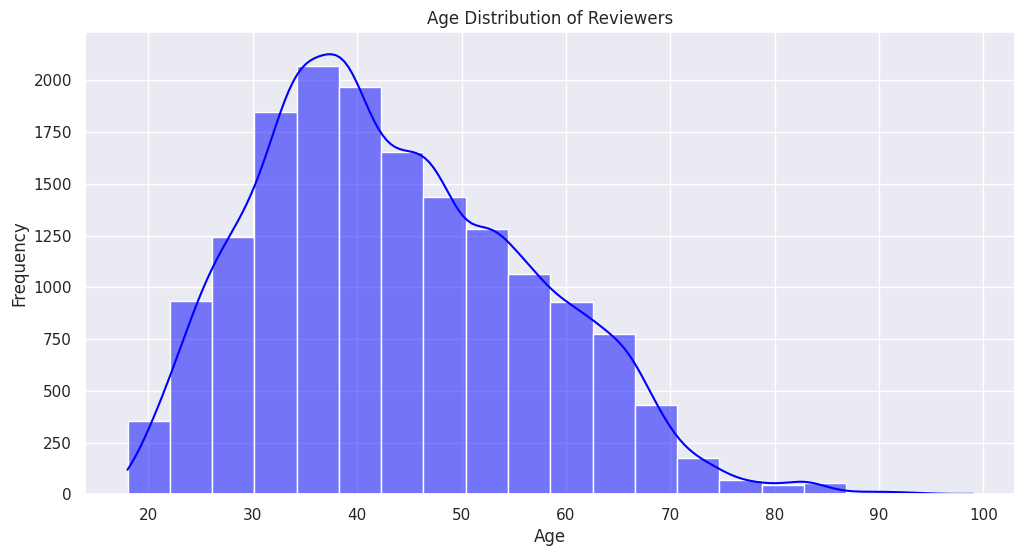

In [114]:
# Visualization for Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

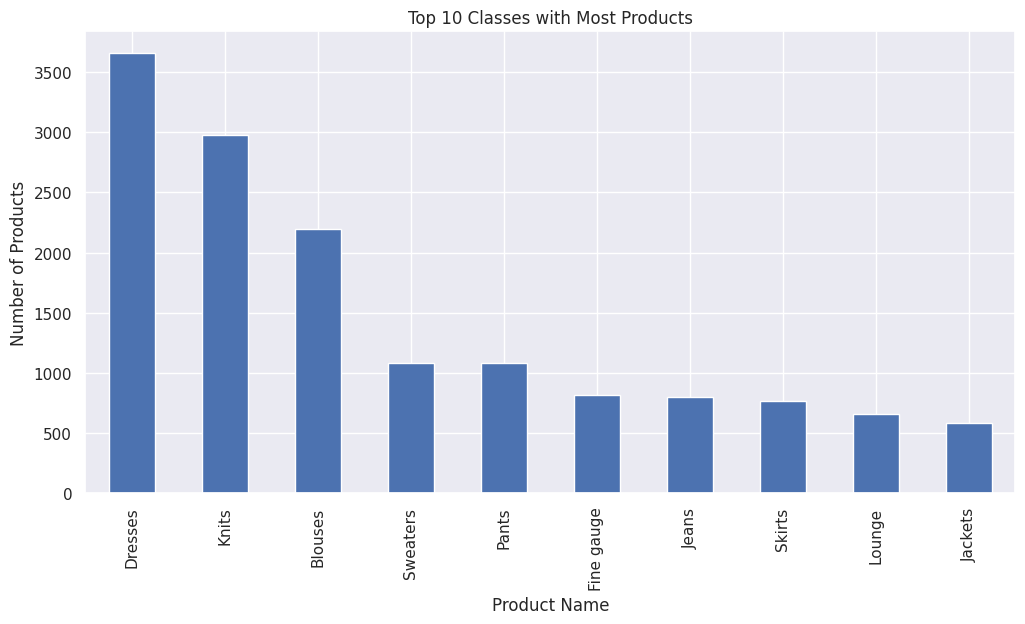

In [115]:
# Visualization for Most Number of Products
plt.figure(figsize=(12, 6))
most_products.plot(kind='bar')
plt.title('Top 10 Classes with Most Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Products')
plt.show()

In [116]:
correlation_matrix = df_mean.corr()
correlation_matrix

,Clothing ID,Age,Rating,Recommended
Clothing ID,1.000000,0.058219,-0.393629,-0.396401
Age,0.058219,1.000000,0.219244,0.157727
Rating,-0.393629,0.219244,1.000000,0.870752
Recommended,-0.396401,0.157727,0.870752,1.000000


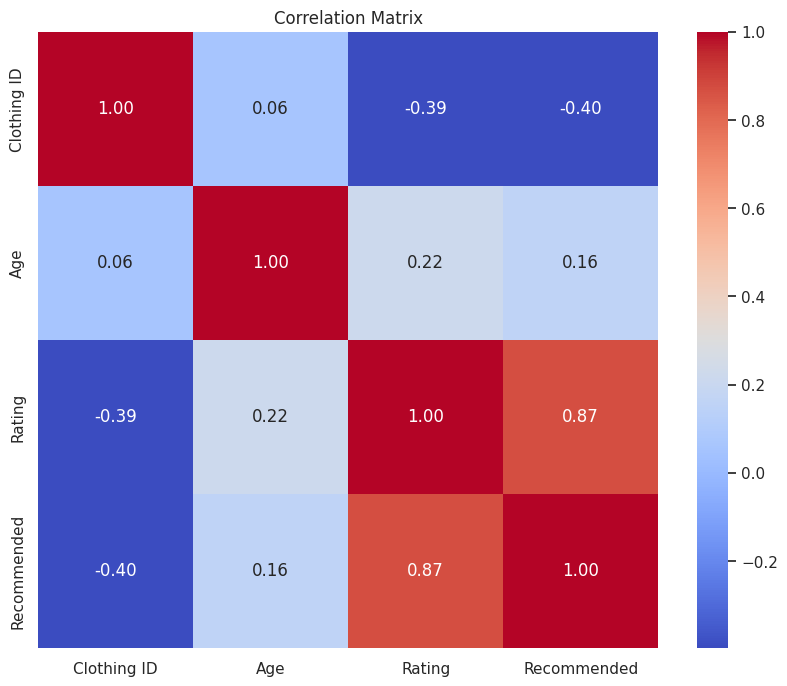

In [117]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals that Rating and Recommended have a strong positive correlation, indicating that higher-rated products are frequently recommended by reviewers.

<ipython-input-118-5dac890a993c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


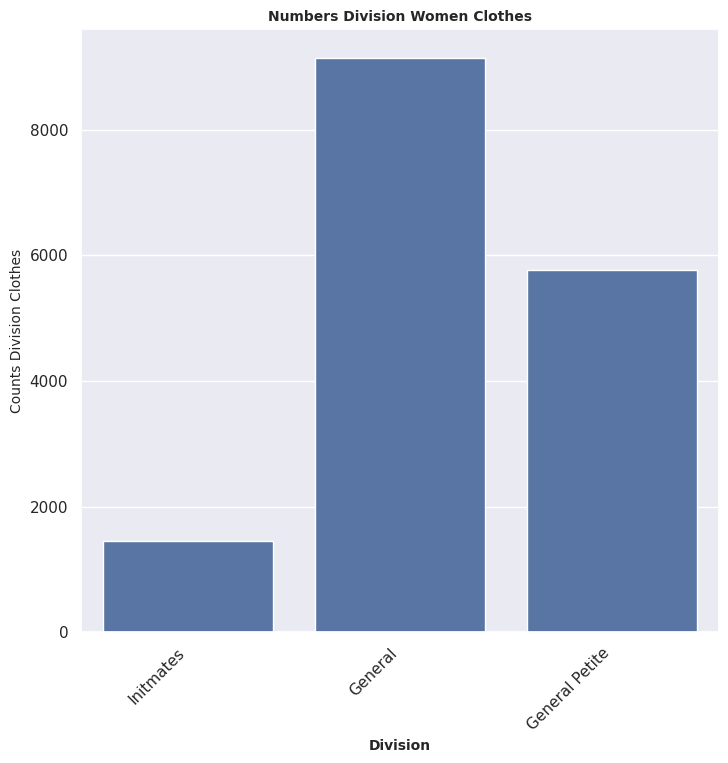

In [118]:
# Set the figure size
fig = plt.figure(figsize=(14, 14))

# Create a subplot
ax1 = plt.subplot2grid((2, 2), (0, 0))

# Create a count plot for the 'Division' column
sns.countplot(x='Division', data=df, ax=ax1)

# Rotate the x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Set the labels and title with specified font size and weight
ax1.set_xlabel('Division', fontsize=10, fontweight="bold")
ax1.set_ylabel('Counts Division Clothes', fontsize=10)
ax1.set_title('Numbers Division Women Clothes', fontsize=10, fontweight="bold")

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-119-ee82ac6ffa8e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
<ipython-input-119-ee82ac6ffa8e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
<ipython-input-119-ee82ac6ffa8e>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")


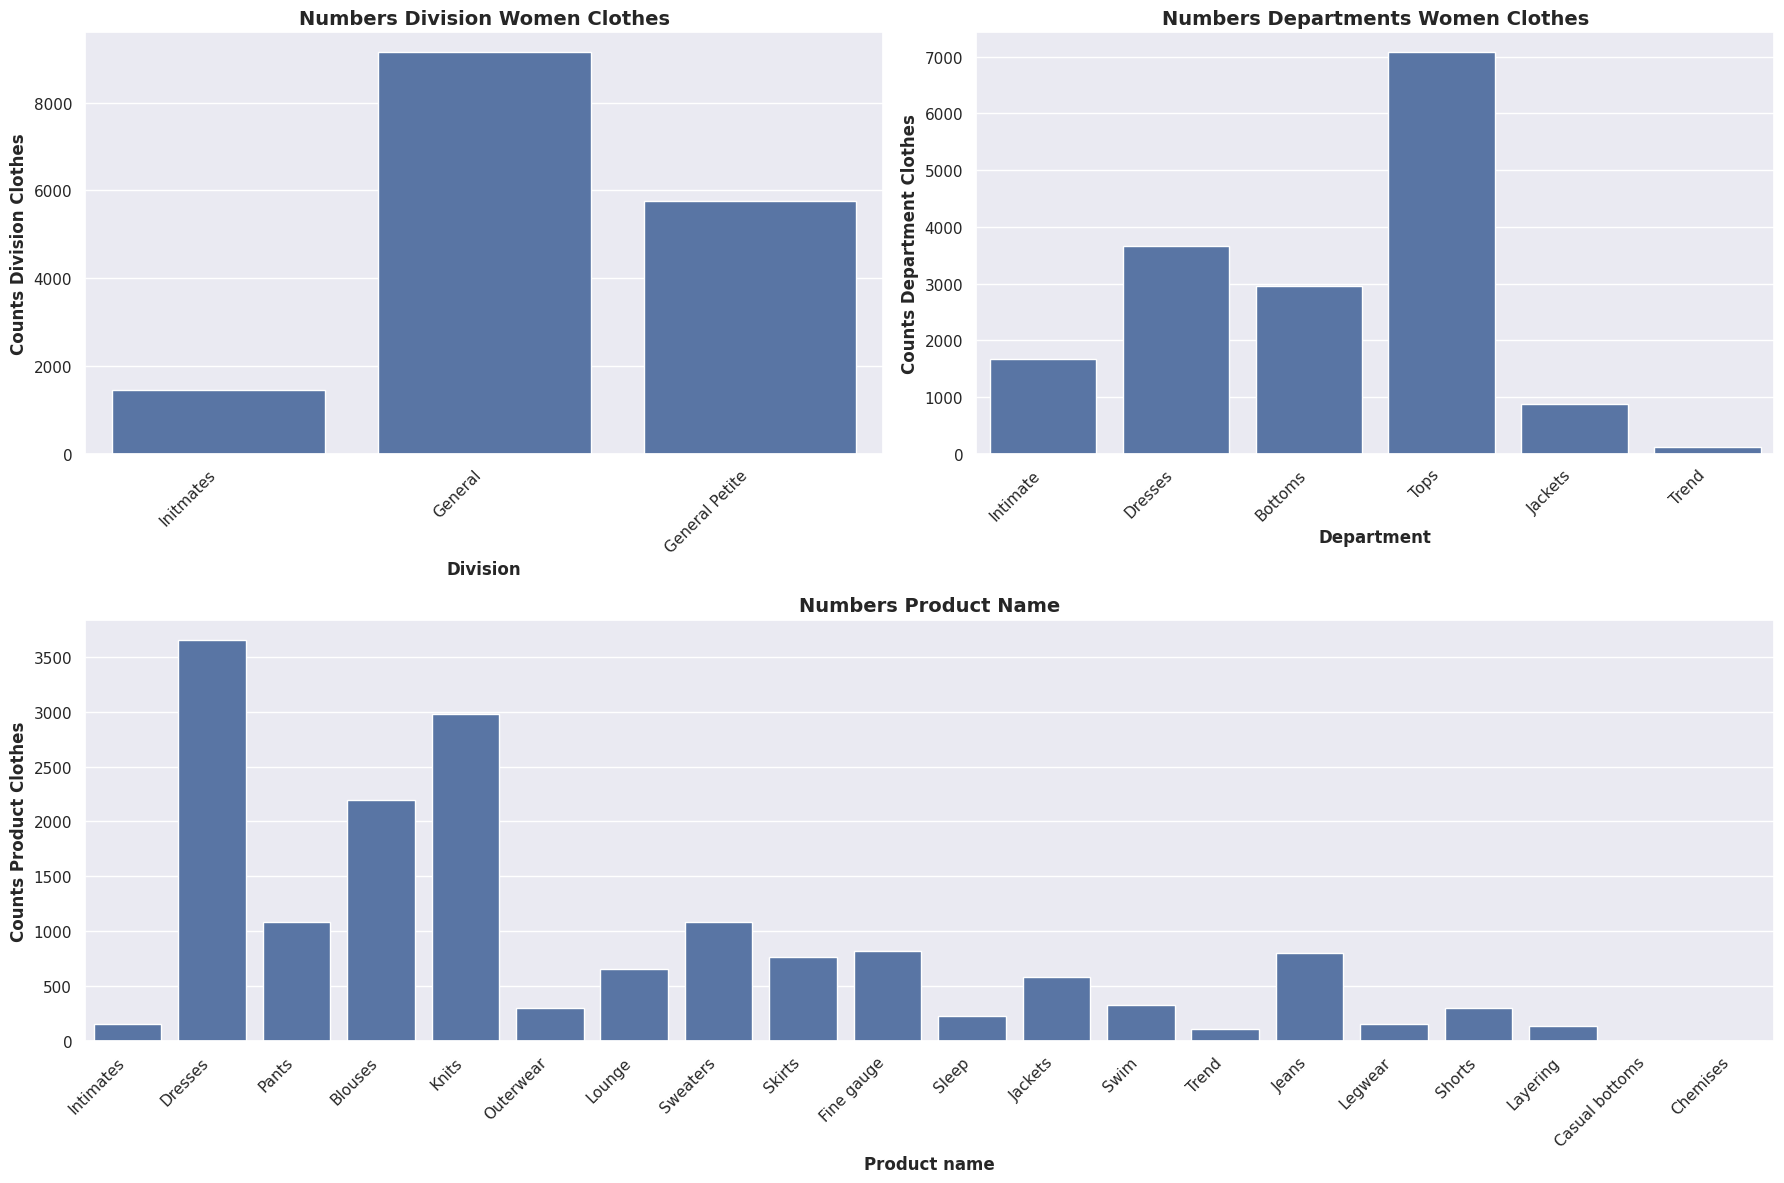

In [119]:
# Set the figure size
fig = plt.figure(figsize=(18, 12))

# Create the first subplot for 'Division'
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.countplot(x='Division', data=df, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax1.set_xlabel('Division', fontsize=12, fontweight="bold")
ax1.set_ylabel('Counts Division Clothes', fontsize=12, fontweight="bold")
ax1.set_title("Numbers Division Women Clothes", fontsize=14, fontweight="bold")

# Create the second subplot for 'Department'
ax2 = plt.subplot2grid((2, 2), (0, 1))
sns.countplot(x='Department', data=df, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
ax2.set_xlabel('Department', fontsize=12, fontweight="bold")
ax2.set_ylabel('Counts Department Clothes', fontsize=12, fontweight="bold")
ax2.set_title("Numbers Departments Women Clothes", fontsize=14, fontweight="bold")

# Create the third subplot for 'Product name'
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
sns.countplot(x='Product name', data=df, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
ax3.set_xlabel('Product name', fontsize=12, fontweight="bold")
ax3.set_ylabel('Counts Product Clothes', fontsize=12, fontweight="bold")
ax3.set_title("Numbers Product Name", fontsize=14, fontweight="bold")

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

In [120]:
data_Rating=df.groupby('Product name')[['Rating']].mean().sort_values(['Rating'],ascending=False).reset_index()

In [121]:
data_Rating.sort_values(['Rating'])

,Product name,Rating
19,Trend,3.773913
18,Dresses,3.818008
17,Knits,3.874412
16,Blouses,3.932999
15,Chemises,4.000000
14,Sweaters,4.011050
13,Fine gauge,4.103912
12,Skirts,4.113874
11,Pants,4.124769
10,Outerwear,4.143813


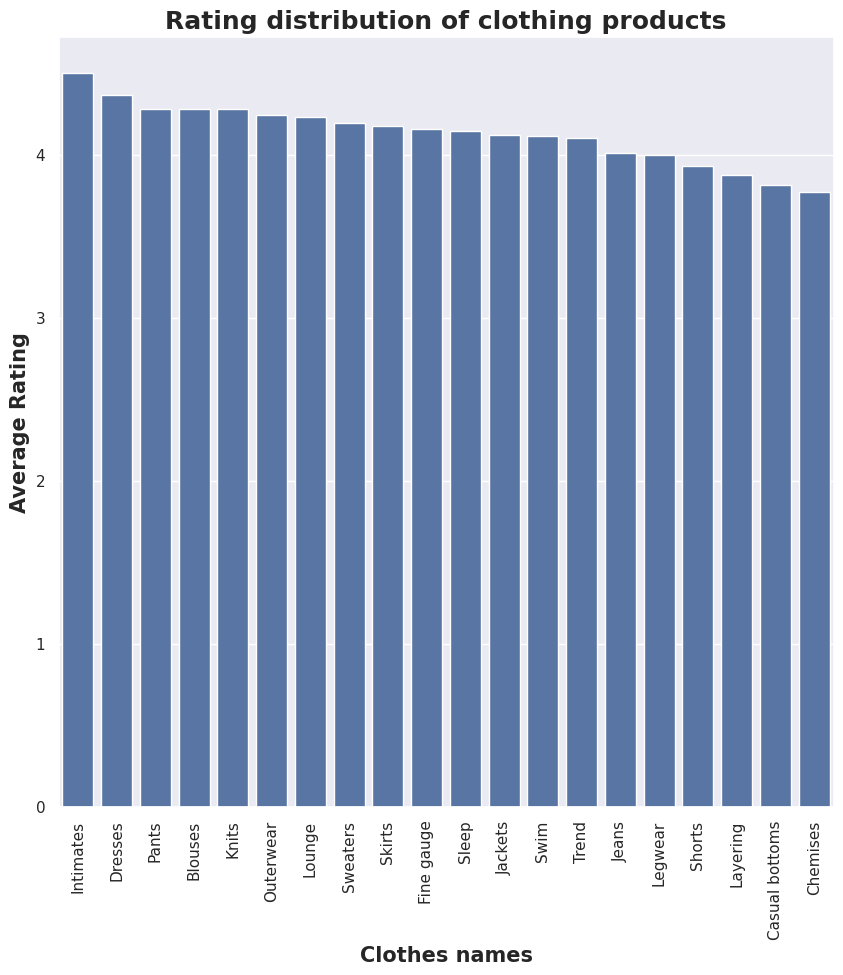

In [122]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Create the bar plot to show the relationship between product names and their average ratings
sns.barplot(x='Product name', y='Rating', data=data_Rating)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the x-axis labels to the specific product names
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
           labels=['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
                   'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
                   'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
                   'Casual bottoms', 'Chemises'])

# Set the labels and title with specified font size and weight
plt.xlabel("Clothes names", size=15, weight='bold')
plt.ylabel("Average Rating", size=15, weight='bold')
plt.title("Rating distribution of clothing products", size=18, weight='bold')

# Show the plot
plt.show()

In [123]:
recommended = df[df['Recommended']==1]
not_recommended = df[df['Recommended']==0]

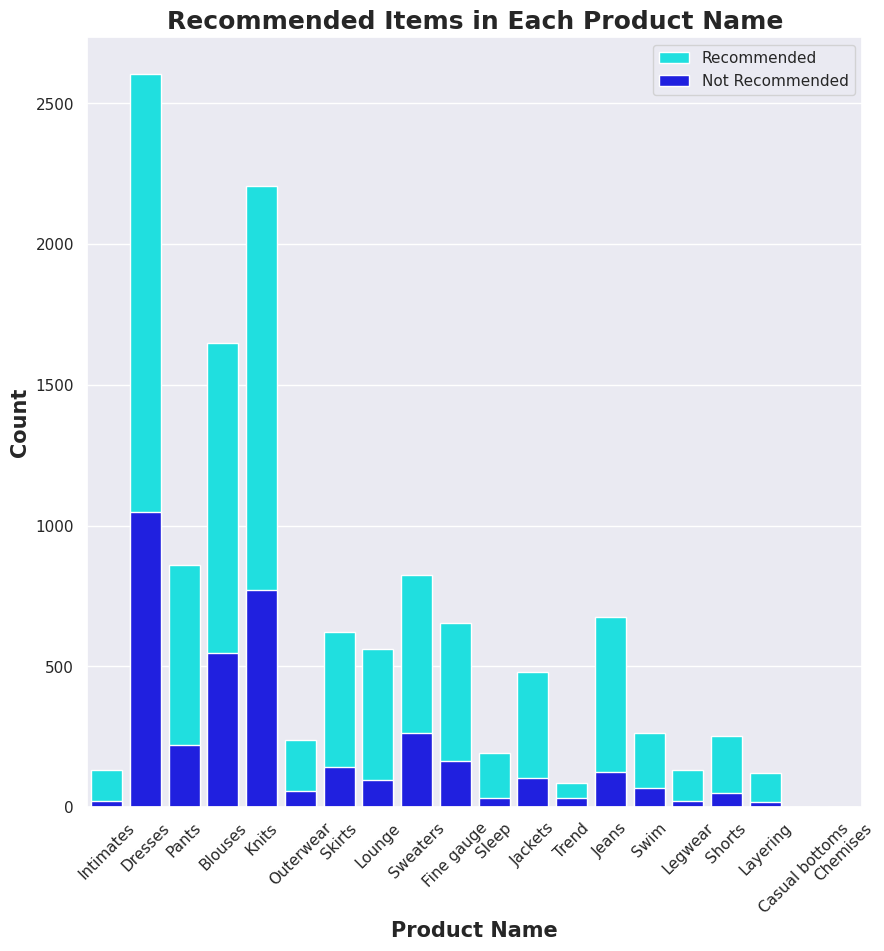

In [124]:
# Set the figure size
plt.figure(figsize=(10, 10))

# Create a count plot for recommended products
sns.countplot(x='Product name', data=recommended, color="cyan", label="Recommended")

# Create a count plot for not recommended products, adding it to the same axes
sns.countplot(x='Product name', data=not_recommended, color="blue", label="Not Recommended")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the labels and title with specified font size and weight
plt.xlabel("Product Name", size=15, weight='bold')
plt.ylabel("Count", size=15, weight='bold')
plt.title("Recommended Items in Each Product Name", size=18, weight='bold')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Overall Observations
- Missing Values: The dataset has missing values in the 'Title' column, which may need imputation or handling. 'Division Name', 'Department Name', and 'Class Name' also have a few missing values.
- Customer Satisfaction: Most products have high ratings, and a significant proportion of customers recommend the products, indicating overall satisfaction.
- Reviewer Demographics: Reviewers are mostly between 30-50 years old.
- Product Insights: Variation in ratings across divisions, departments, and classes can help target areas for improvement or highlight successful product lines.
- The correlation between Rating and Recommended is 0.870752, which is a very high positive correlation. This indicates a strong relationship between higher ratings and the likelihood of recommending the product. In other words, products that receive higher ratings are much more likely to be recommended by the reviewers.
